## Getting the data in the environment

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Image_captioning_model_001"

Flickr8k.token.txt.zip	images.zip


In [ ]:
!unzip "/content/drive/MyDrive/Image_captioning_model_001/images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/2844747252_64567cf14a.jpg  
  inflating: images/2844846111_8c1cbfc75d.jpg  
  inflating: images/2844963839_ff09cdb81f.jpg  
  inflating: images/2845246160_d0d1bbd6f0.jpg  
  inflating: images/2845691057_d4ab89d889.jpg  
  inflating: images/2845845721_d0bc113ff7.jpg  
  inflating: images/2846037553_1a1de50709.jpg  
  inflating: images/2846785268_904c5fcf9f.jpg  
  inflating: images/2846843520_b0e6211478.jpg  
  inflating: images/2847514745_9a35493023.jpg  
  inflating: images/2847615962_c330bded6e.jpg  
  inflating: images/2847859796_4d9cb0d31f.jpg  
  inflating: images/2848266893_9693c66275.jpg  
  inflating: images/2848571082_26454cb981.jpg  
  inflating: images/2848895544_6d06210e9d.jpg  
  inflating: images/2848977044_446a31d86e.jpg  
  inflating: images/2849194983_2968c72832.jpg  
  inflating: images/2850719435_221f15e951.jpg  
  inflating: images/2851198725_37b6027625.jpg  
  inflating: images/2851304910_b57211

In [ ]:
!unzip "/content/drive/MyDrive/Image_captioning_model_001/Flickr8k.token.txt.zip"

Archive:  /content/drive/MyDrive/Image_captioning_model_001/Flickr8k.token.txt.zip
replace Flickr8k.token.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Flickr8k.token.txt      


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = '/content/images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [ ]:
images[:5]

['/content/images/3461041826_0e24cdf597.jpg',
 '/content/images/2068465241_3bcabacfd7.jpg',
 '/content/images/455611732_d65bf3e976.jpg',
 '/content/images/1057089366_ca83da0877.jpg',
 '/content/images/3603064161_a8f3b6455d.jpg']

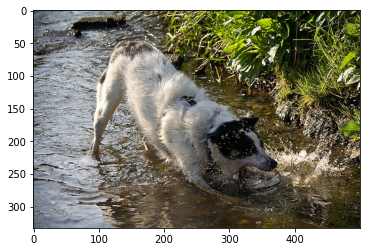

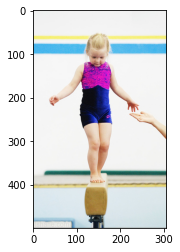

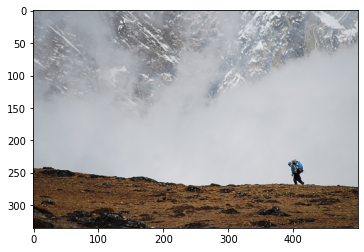

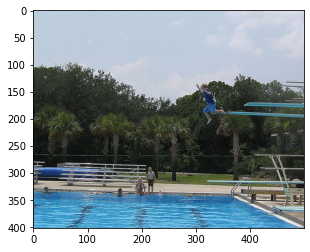

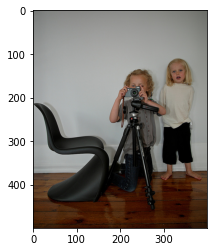

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
!pip install resnet

In [ ]:
from keras.applications.resnet50 import ResNet50

incept_model = ResNet50(include_top=True)
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 2000:
        break
        
    elif count % 100 == 0:
        print(count)
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [ ]:
len(images_features)

2001

In [ ]:
caption_path = "/content/Flickr8k.token.txt"

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

2001

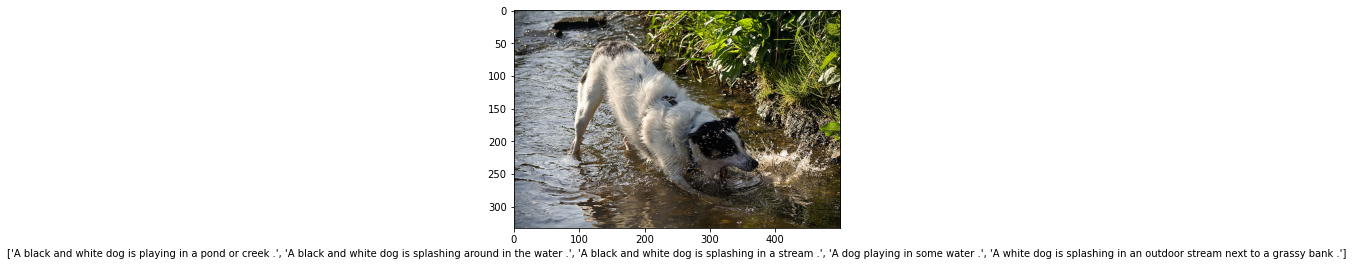

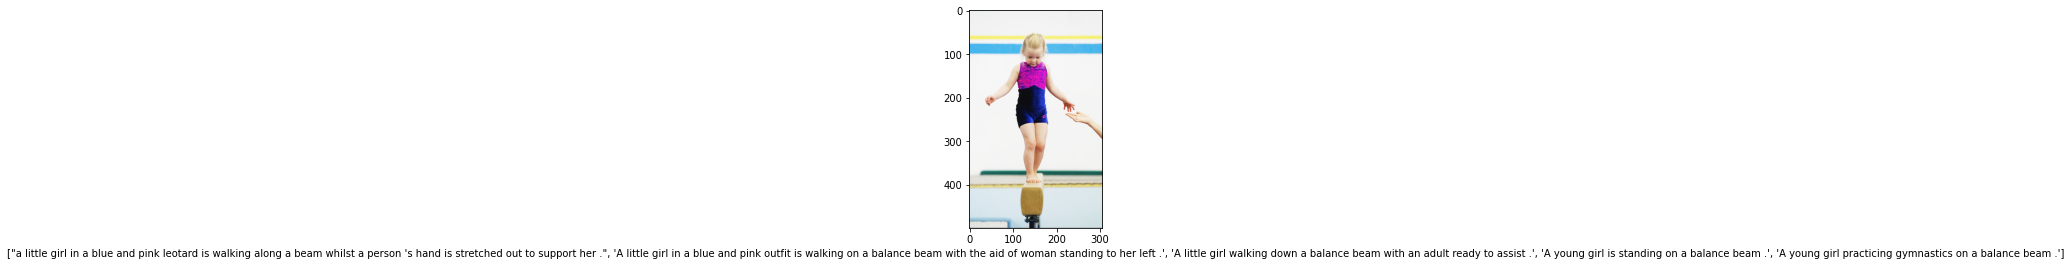

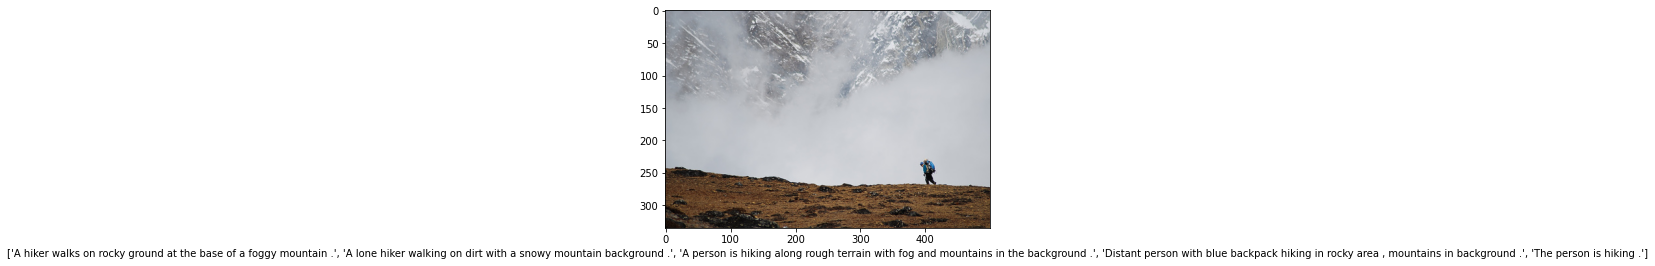

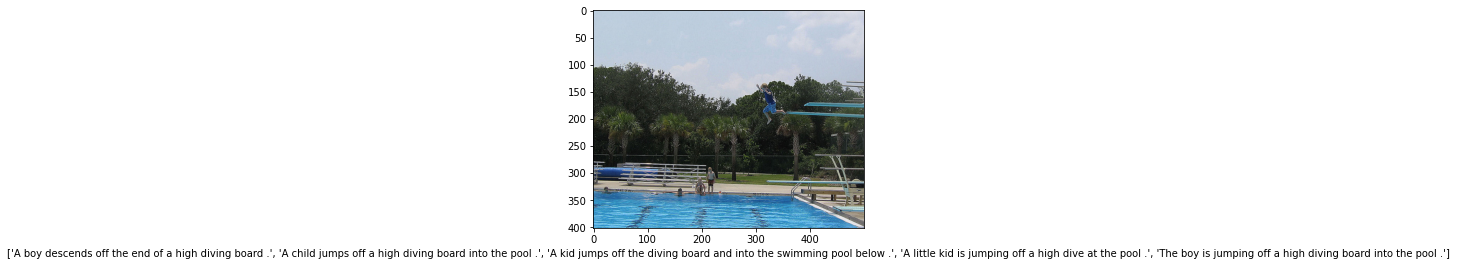

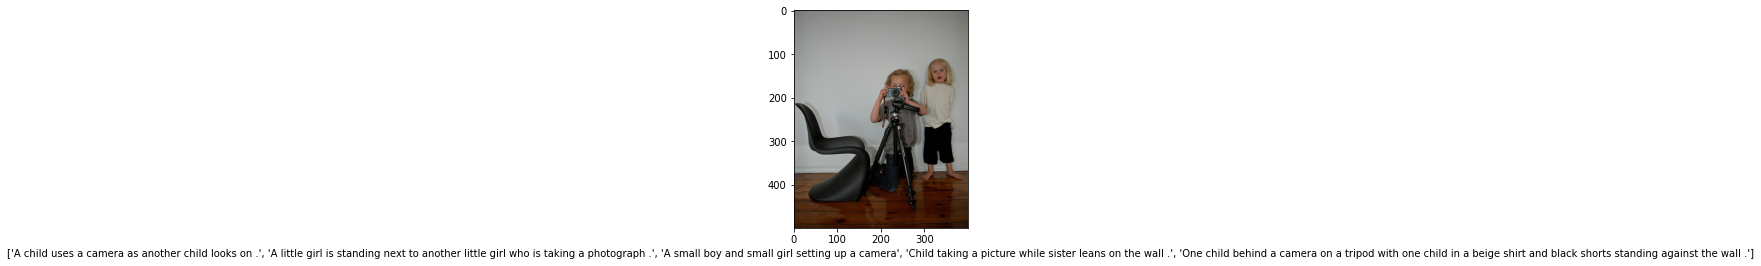

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

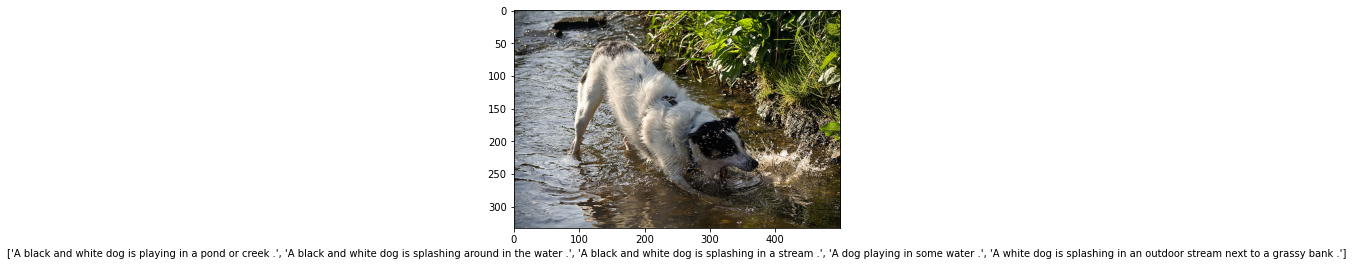

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '/content/images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

4590

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

4590

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'101669240_b2d3e7f17b.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   2,
   11,
   4,
   2,
   12,
   5,
   13,
   14],
  [1, 2, 3, 15, 16, 17, 3, 7, 18, 4, 19, 20, 13, 14],
  [1, 2, 21, 22, 15, 23, 24, 25, 8, 26, 27, 4, 19, 20, 13, 14],
  [1, 2, 11, 28, 24, 25, 8, 4, 19, 20, 9, 10, 29, 13, 14],
  [1, 3, 30, 15, 23, 24, 31, 32, 33, 4, 19, 20, 14]],
 '1019604187_d087bf9a5f.jpg': [[1,
   2,
   34,
   35,
   10,
   36,
   2,
   37,
   38,
   4,
   2,
   39,
   40,
   41,
   42,
   13,
   14],
  [1, 2, 43, 34, 6, 44, 10, 36, 2, 45, 46, 4, 47, 48, 13, 14],
  [1, 2, 43, 34, 6, 44, 10, 36, 2, 45, 34, 49, 13, 14],
  [1, 2, 43, 34, 6, 50, 10, 36, 2, 45, 46, 51, 52, 19, 53, 13, 14],
  [1, 2, 43, 34, 54, 55, 2, 45, 46, 14]],
 '1024138940_f1fefbdce1.jpg': [[1,
   56,
   57,
   58,
   59,
   60,
   61,
   43,
   62,
   63,
   30,
   19,
   64,
   13,
   14],
  [1, 56, 62, 65, 66, 2, 67, 30, 2, 68, 69, 64, 13, 14],
  [1, 56, 62, 70, 4, 19, 69, 24, 19, 64, 13, 14],
  [1, 5

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 10, 2, 11, 4, 2, 12, 5, 13, 14]
[1, 2, 3, 6, 108, 19, 109, 59, 2, 104, 27, 10, 94, 48, 4, 110, 59, 111, 112, 107, 17, 3, 28, 30, 13, 14]
[1, 2, 3, 4, 141, 213, 2, 184, 170, 27, 4, 19, 53, 61, 217, 32, 216, 10, 218, 130, 219, 96, 220, 36, 216, 13, 14]
[1, 2, 127, 4, 2, 90, 61, 84, 644, 40, 43, 500, 6, 272, 9, 10, 2, 3, 4, 2, 645, 61, 2, 127, 4, 2, 646, 328, 61, 84, 61, 43, 647, 434, 13, 14]
[1, 81, 1940, 3, 22, 2, 93, 632, 61, 12, 255, 6, 108, 27, 1877, 1938, 1941, 4, 110, 59, 94, 310, 121, 107, 272, 30, 2, 411, 329, 4, 110, 59, 2, 151, 59, 448, 70, 1942, 13, 14]


In [ ]:
MAX_LEN

40

In [ ]:
captions_dict

{'101669240_b2d3e7f17b.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   2,
   11,
   4,
   2,
   12,
   5,
   13,
   14],
  [1, 2, 3, 15, 16, 17, 3, 7, 18, 4, 19, 20, 13, 14],
  [1, 2, 21, 22, 15, 23, 24, 25, 8, 26, 27, 4, 19, 20, 13, 14],
  [1, 2, 11, 28, 24, 25, 8, 4, 19, 20, 9, 10, 29, 13, 14],
  [1, 3, 30, 15, 23, 24, 31, 32, 33, 4, 19, 20, 14]],
 '1019604187_d087bf9a5f.jpg': [[1,
   2,
   34,
   35,
   10,
   36,
   2,
   37,
   38,
   4,
   2,
   39,
   40,
   41,
   42,
   13,
   14],
  [1, 2, 43, 34, 6, 44, 10, 36, 2, 45, 46, 4, 47, 48, 13, 14],
  [1, 2, 43, 34, 6, 44, 10, 36, 2, 45, 34, 49, 13, 14],
  [1, 2, 43, 34, 6, 50, 10, 36, 2, 45, 46, 51, 52, 19, 53, 13, 14],
  [1, 2, 43, 34, 54, 55, 2, 45, 46, 14]],
 '1024138940_f1fefbdce1.jpg': [[1,
   56,
   57,
   58,
   59,
   60,
   61,
   43,
   62,
   63,
   30,
   19,
   64,
   13,
   14],
  [1, 56, 62, 65, 66, 2, 67, 30, 2, 68, 69, 64, 13, 14],
  [1, 56, 62, 70, 4, 19, 69, 24, 19, 64, 13, 14],
  [1, 5

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)


(127552, 127552, 127552)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((127552, 2048), (127552, 40), (127552, 4591))

In [ ]:
X[1110]

array([2.4000804e-01, 3.3287880e+00, 2.4660191e-01, ..., 3.1331219e-02,
       1.4837177e-03, 7.9037510e-02], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 40, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 128)           587648    
_________________________________________________________________
lstm (LSTM)                  (None, 40, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 40, 128)           32896     
Total params: 1,014,784
Trai

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
250/250 [==============================] - 42s 96ms/step - loss: 5.4504 - accuracy: 0.1145
Epoch 2/100
250/250 [==============================] - 25s 99ms/step - loss: 5.0242 - accuracy: 0.1375
Epoch 3/100
250/250 [==============================] - 24s 98ms/step - loss: 4.4442 - accuracy: 0.2346
Epoch 4/100
250/250 [==============================] - 24s 97ms/step - loss: 4.1948 - accuracy: 0.2612
Epoch 5/100
250/250 [==============================] - 24s 97ms/step - loss: 4.0035 - accuracy: 0.2834
Epoch 6/100
250/250 [==============================] - 24s 98ms/step - loss: 3.8239 - accuracy: 0.3060
Epoch 7/100
250/250 [==============================] - 24s 97ms/step - loss: 3.6183 - accuracy: 0.3273
Epoch 8/100
250/250 [==============================] - 24s 97ms/step - loss: 3.4211 - accuracy: 0.3493
Epoch 9/100
250/250 [==============================] - 24s 97ms/step - loss: 3.2774 - accuracy: 0.3675
Epoch 10/100
250/250 [==============================] - 24s 97ms/step - l

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model_1.h5')

In [ ]:
model.save_weights('mine_model_1_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

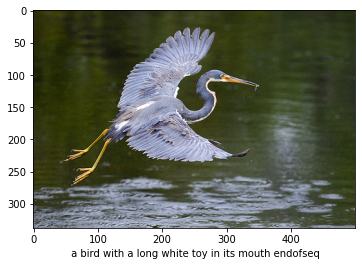

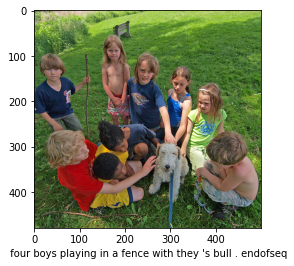

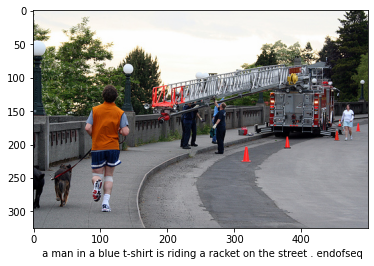

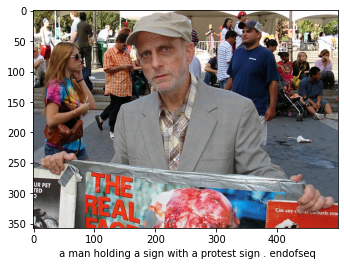

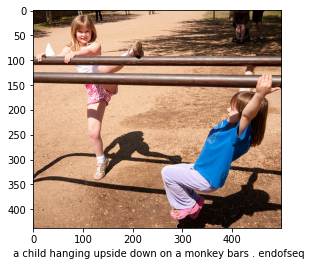

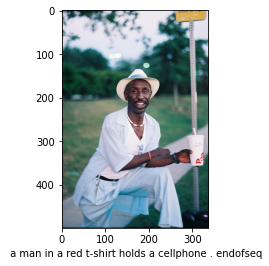

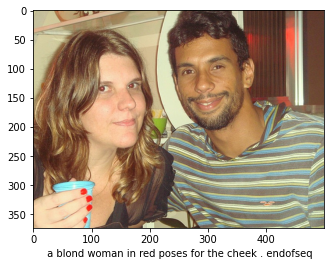

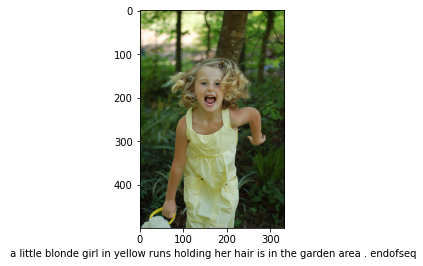

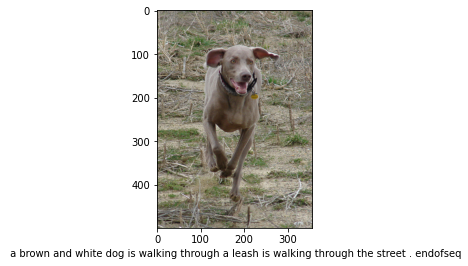

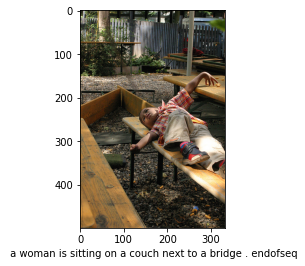

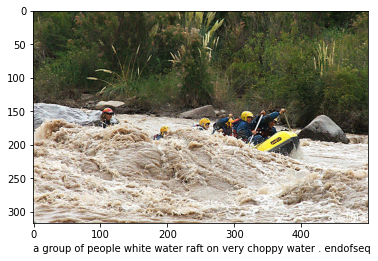

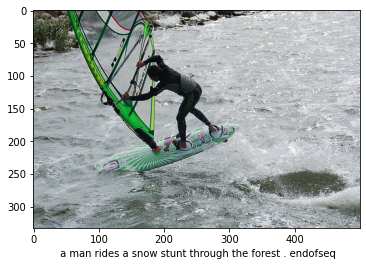

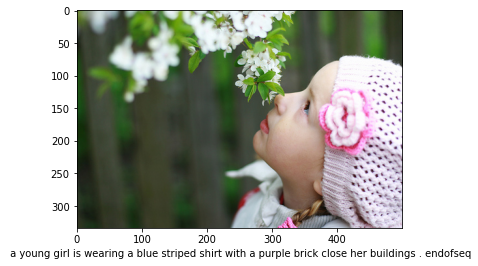

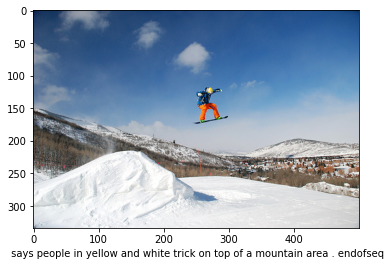

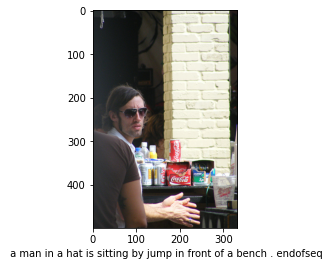

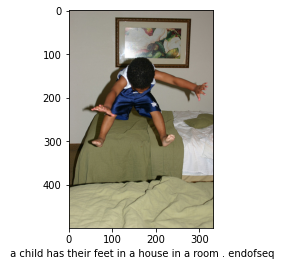

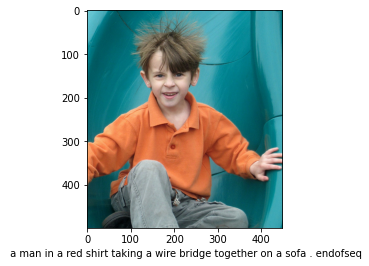

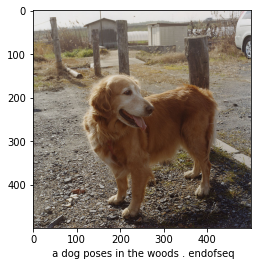

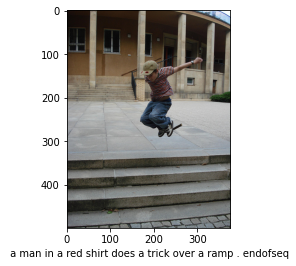

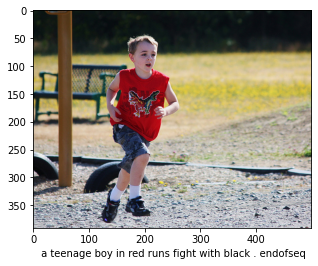

In [ ]:
for i in range(20):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)